In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"
#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mdd =  pd.read_csv("data/mouse_drug_data.csv")
ctd =  pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
dataset = pd.merge(ctd,mdd,how="left",on="Mouse ID")

# Display the data table for preview
dataset.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_TV = dataset.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
mean_TV = pd.DataFrame(mean_TV).reset_index()

# Preview DataFrame
mean_TV.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
sem_TV = dataset.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
sem_TV = pd.DataFrame(sem_TV).reset_index()
# Preview DataFrame
sem_TV.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames for Mean Tumor Volume Data 
# pivoting table to make drugs as the columns
mean_TV_table = mean_TV.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_TV_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames for Standard Error of Tumor Volumes data
# pivoting table to make drugs as the columns
sem_TV_table = sem_TV.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
sem_TV_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


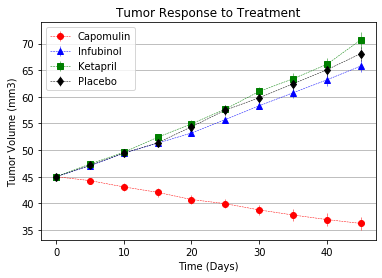

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_TV_table.index, mean_TV_table["Capomulin"], yerr=sem_TV_table["Capomulin"], color="r", marker="o", linestyle="dashed",linewidth=0.50, label="Capomulin")
plt.errorbar(mean_TV_table.index, mean_TV_table["Infubinol"], yerr=sem_TV_table["Infubinol"], color="b", marker="^", linestyle="dashed",linewidth=0.50, label="Infubinol")
plt.errorbar(mean_TV_table.index, mean_TV_table["Ketapril"], yerr=sem_TV_table["Ketapril"], color="g", marker="s", linestyle="dashed",linewidth=0.50, label="Ketapril")
plt.errorbar(mean_TV_table.index, mean_TV_table["Placebo"], yerr=sem_TV_table["Placebo"], color="black", marker="d", linestyle="dashed",linewidth=0.50, label="Placebo")

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis="y")
plt.legend(loc="best")

# Save the Figure
plt.savefig("TumorResponseToTreatment.png")

plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metasite_mean = dataset.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
metasite_mean = pd.DataFrame(metasite_mean)

# Preview DataFrame
metasite_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metasite_sem = dataset.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
metasite_sem = pd.DataFrame(metasite_sem)

# Preview DataFrame
metasite_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metasite_mean  = metasite_mean.reset_index()
metasite_mean_table = metasite_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
metasite_mean_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames
metasite_sem  = metasite_sem.reset_index()
metasite_sem_table = metasite_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
metasite_sem_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


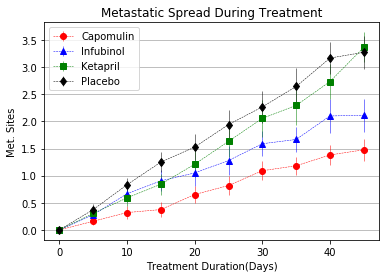

In [13]:
# Generate the Plot (with Error Bars)
plt.errorbar(metasite_mean_table.index, metasite_mean_table["Capomulin"], yerr=metasite_sem_table["Capomulin"], color="r", marker="o", linestyle="dashed",linewidth=0.50, label="Capomulin")
plt.errorbar(metasite_mean_table.index, metasite_mean_table["Infubinol"], yerr=metasite_sem_table["Infubinol"], color="b", marker="^", linestyle="dashed",linewidth=0.50, label="Infubinol")
plt.errorbar(metasite_mean_table.index, metasite_mean_table["Ketapril"], yerr=metasite_sem_table["Ketapril"], color="g", marker="s", linestyle="dashed",linewidth=0.50, label="Ketapril")
plt.errorbar(metasite_mean_table.index, metasite_mean_table["Placebo"], yerr=metasite_sem_table["Placebo"], color="black", marker="d", linestyle="dashed",linewidth=0.50, label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration(Days)")
plt.grid(axis="y")
plt.legend(loc="best")

# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")

plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = dataset.groupby(["Drug","Timepoint"])['Mouse ID'].count()
# Convert to DataFrame
mice_count = pd.DataFrame(mice_count).reset_index()
mice_count = mice_count.rename(columns={'Mouse ID': 'Mouse Count'})
# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_table = mice_count.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
# Preview the Data Frame
mice_count_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


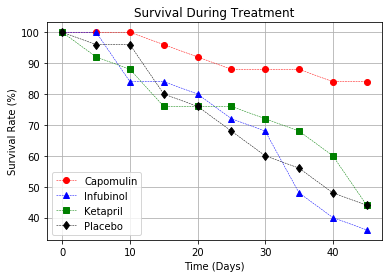

In [16]:
# Generate the Plot (Accounting for percentages)
cmc = 100 * mice_count_table["Capomulin"] / 25
imc = 100 * mice_count_table["Infubinol"] / 25
kmc = 100 * mice_count_table["Ketapril"] / 25
pmc = 100 * mice_count_table["Placebo"] / 25
plt.plot(cmc, color="red", marker="o", linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.plot(imc, color="blue", marker="^", linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.plot(kmc, color="green", marker="s", linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.plot(pmc,  color="black", marker="d",linestyle="dashed", linewidth=0.50, label="Placebo")
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.legend(loc="best")
plt.grid(True)

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
t_per_change =  (mean_TV_table.iloc[-1] - mean_TV_table.iloc[0])*100 / mean_TV_table.iloc[0]
# Display the data to confirm
t_per_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

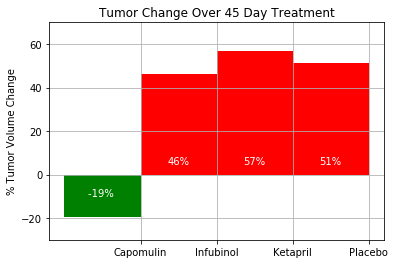

In [18]:
# Store all Relevant Percent Changes into a Tuple
tumor_per_change = (t_per_change["Capomulin"],t_per_change["Infubinol"],t_per_change["Ketapril"],t_per_change["Placebo"])

# Splice the data between passing and failing drugs
fig, sp = plt.subplots()
ind = np.arange(len(tumor_per_change))  
width = 1
barpass = sp.bar(ind[0], tumor_per_change[0], width, color='green')
barfail = sp.bar(ind[1:], tumor_per_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
sp.set_title('Tumor Change Over 45 Day Treatment')
sp.set_ylabel('% Tumor Volume Change')
sp.set_xticks(ind + 0.5)
sp.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
sp.set_ylim([-30,70])
sp.grid(True)

# Use functions to label the percentages of changes
def passlabel(bar):
    for i in bar:
        height = i.get_height()
        sp.text(i.get_x() + i.get_width()/2, -10,'%d%% ' % int(height),ha='center', color="white")
def faillabel(bar):
    for i in bar:
        height = i.get_height()
        sp.text(i.get_x() + i.get_width()/2, 5,'%d%%' % int(height),ha='center', color="white")

# Call functions to implement the function calls
passlabel(barpass)
faillabel(barfail)

# Save the Figure
plt.savefig("TumorChangeOver45DayTreatment.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)